# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
# Import day.csv dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Removing unwanted Columns
df = df.drop(columns=['instant','dteday','atemp','casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [8]:
# Map the values for season, mnth, weekday and weathersit variables
df[['season']]=df[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}))
df[['mnth']]=df[['mnth']].apply(lambda x: x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul',
                                                 8: 'aug',9: 'sep',10: 'oct', 11: 'nov',12: 'dec'}))
df[['weekday']]=df[['weekday']].apply(lambda x: x.map({1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday',
                                                       5: 'friday', 6: 'saturday', 0: 'sunday'}))
df[['weathersit']]=df[['weathersit']].apply(lambda x: x.map({1: 'clear', 2: 'mist_cloudy', 3: 'lightsnow_lightrain',
                                                             4: 'heavyrain_heavysnow'}))

In [9]:
# check information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Step 2: Data Visualization

## 2.1: Visualizing Numeric Variables

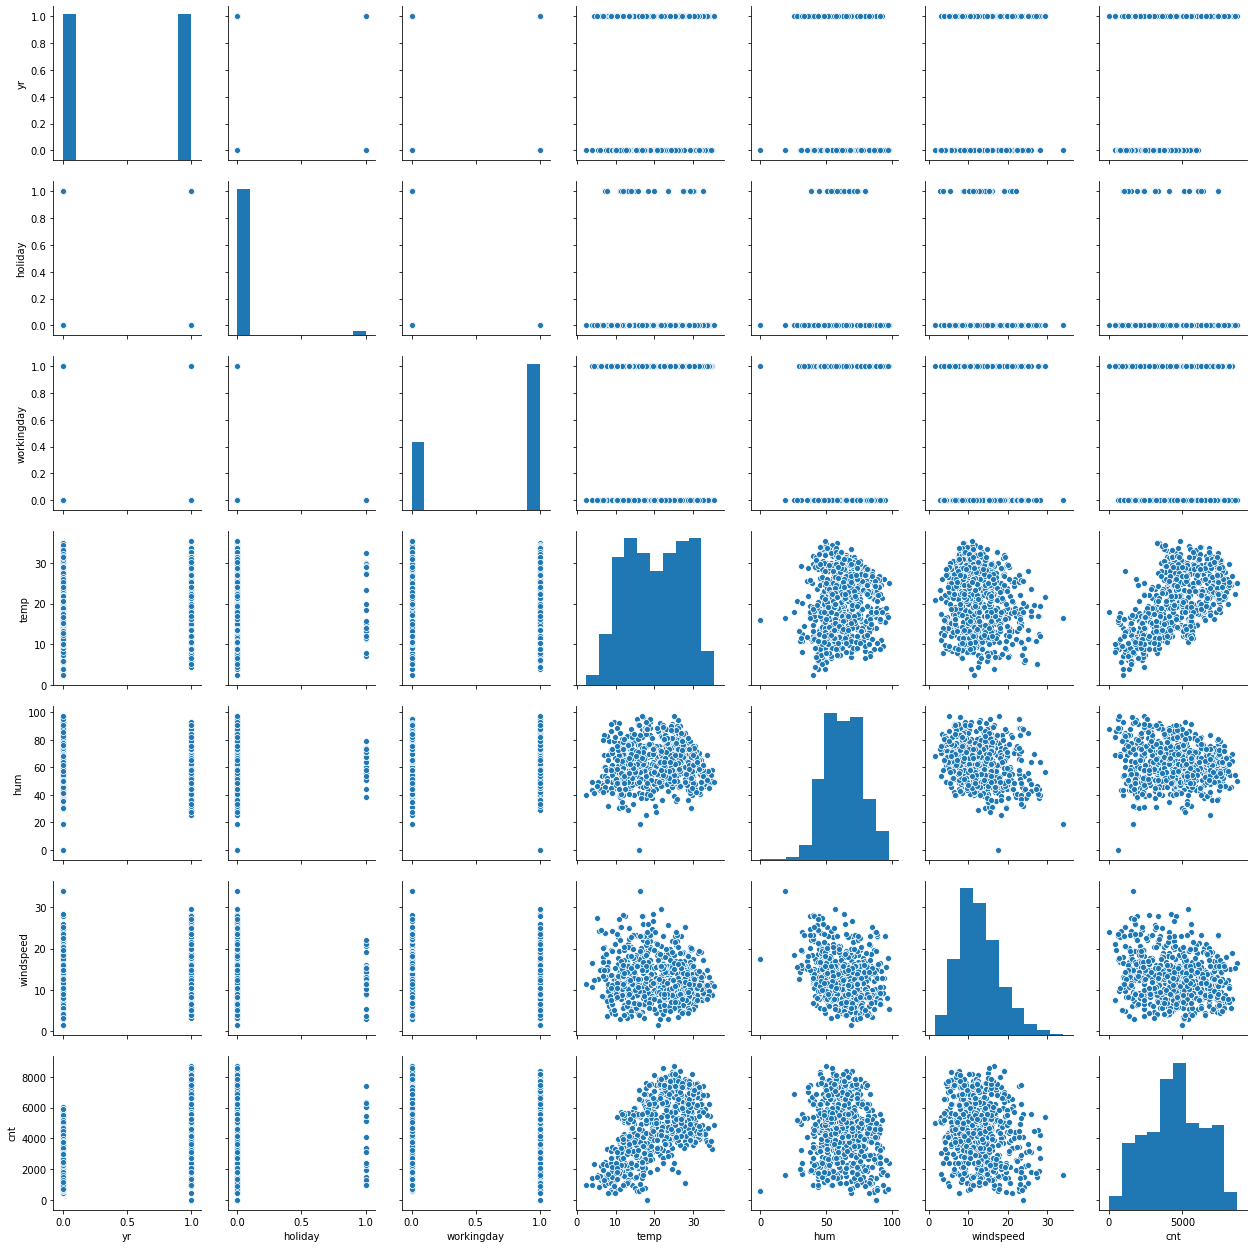

In [10]:
sns.pairplot(df)
plt.show()

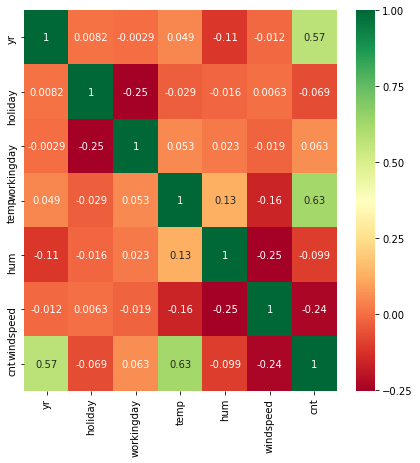

In [11]:
# Correlation and heat map
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

'temp' and 'yr' has high positive linear correlation with 'cnt'.

## 2.2: Visualizing Categorical Variables

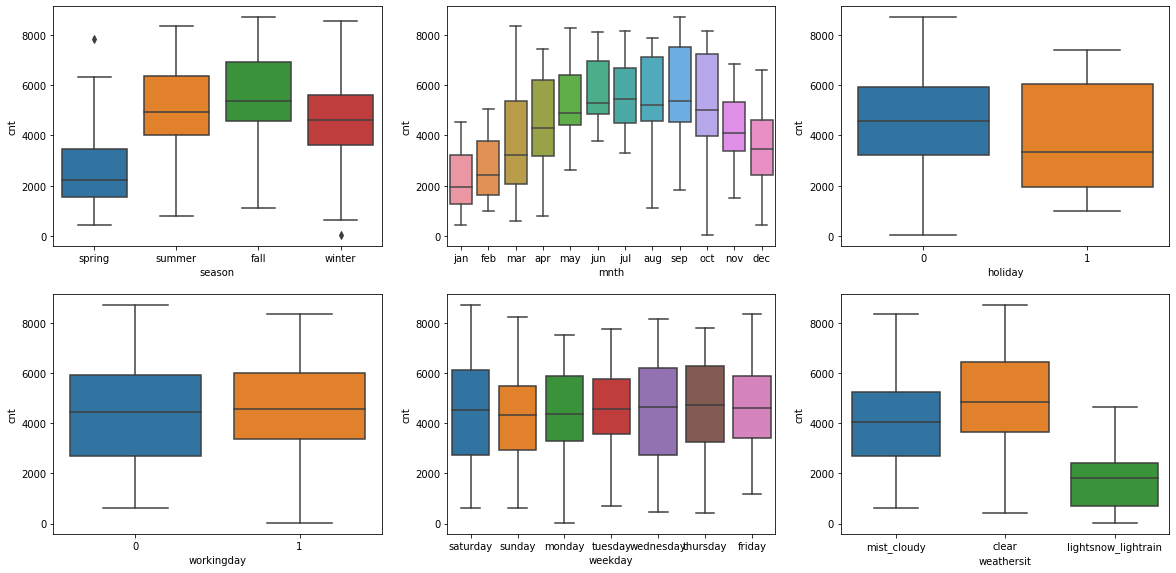

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

1. season: Maximum bike booking happened during ‘fall’ season with a median of around 5000. This number was followed by ‘summer’ and ‘winter’ season.
2. mnth: Maximum number of bike booking happened during May to October with a median of above 4000.
3. holiday: Maximum number of bike booking happened when it is a holiday.
4. workingday: Median for both working and non-working day is almost same, which is around 4000.
5. weekday: Weekday shows a very similar trend throughout the week having medians in the range of 4000 to 5000.
6. weathersit: Highest number of bookings were happening in ‘clear’ weathersit with a median of around 5000. It is followed by ‘mist_cloudy’ weather.

# Step 3: Data Preparation

## 3.1:Create Dummy Variables for All The Categorical Features

In [13]:
df = pd.get_dummies(df,drop_first=True)

In [14]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday',
       'weathersit_lightsnow_lightrain', 'weathersit_mist_cloudy'],
      dtype='object')

## 3.2: Splitting the Data into Training and Testing Sets

In [15]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## 3.3: Perform Scaling

Using MinMax scaling

In [16]:
scaler = MinMaxScaler()

In [17]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow_lightrain,weathersit_mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
# Check all variable ranges using describe
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow_lightrain,weathersit_mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.4:Dividing into X and Y sets for the model building

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step4: Building our model

## 4.1: Use RFE to find top 15 predictor variable

In [20]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 6),
 ('weekday_thursday', False, 11),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 12),
 ('weathersit_lightsnow_lightrain', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_saturday',
       'weathersit_lightsnow_lightrain', 'weathersit_mist_cloudy'],
      dtype='object')

In [23]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_monday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

## 4.2: Building model using statsmodel, for the detailed statistics

### 4.2.1: First Linear Model

In [24]:
# Creating X_test dataframe with RFE selected variables
X_train_lm1 = X_train[col]

# Adding a constant variable
X_train_lm1 = sm.add_constant(X_train_lm1)

# Running the Linear Model
lm1 = sm.OLS(y_train,X_train_lm1).fit()

# Summary of Linear Model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        12:30:31   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [25]:
# Calculate the VIFs for the new model
X_train_lm1 = X_train_lm1.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values,i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_mist_cloudy,2.29
0,yr,2.09
12,weekday_saturday,1.98


In [26]:
# Dropping highly correlated variable, which has exceptionally high VIF
X_train_new = X_train_lm1.drop('hum', 1)

### 2.2.2: Second Linear Model

In [27]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        12:36:02   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [28]:
# Calculate the VIFs for the new model
X_train_lm2 = X_train_lm2.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values,i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_saturday,1.97
8,mnth_jan,1.62
9,mnth_jul,1.59


In [29]:
# Dropping the variable having high p-value
X_train_new = X_train_lm2.drop('holiday', 1)

### 4.2.3: Third Linear Model

In [30]:
# Third Linear Model
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          4.11e-189
Time:                        12:37:01   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [31]:
# Calculate the VIFs for the new model
X_train_lm3 = X_train_lm3.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values,i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.31
0,yr,2.08
6,season_winter,1.92
10,weekday_saturday,1.84
7,mnth_jan,1.62
8,mnth_jul,1.59


In [32]:
# Removing the variable with high p-value
X_train_new = X_train_lm3.drop('mnth_jan',1)

### 4.2.4: Fourth Linear Model

In [33]:
# Fourth Linear Model
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.28e-189
Time:                        12:38:05   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [34]:
# Calculate the VIFs for the new model
X_train_lm4 = X_train_lm4.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4.values,i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,yr,2.07
6,season_winter,1.92
9,weekday_saturday,1.83
7,mnth_jul,1.58
11,weathersit_mist_cloudy,1.56


In [35]:
# Removing the variable with high p-value
X_train_new = X_train_lm4.drop('mnth_jul',1)

### 4.2.5: Fifth Linear Model

In [36]:
# Fifth Linear Model
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.86e-189
Time:                        12:38:40   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [37]:
# Calculate the VIFs for the new model
X_train_lm5 = X_train_lm5.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm5.values,i) for i in range(X_train_lm5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,yr,2.07
5,season_summer,1.99
8,weekday_saturday,1.83
6,season_winter,1.77
10,weathersit_mist_cloudy,1.56
7,mnth_sep,1.23


In [39]:
# Removing the variable with high p-value
X_train_new = X_train_lm5.drop('season_spring',1)

### 4.2.6: Sixth Linear Model

In [40]:
# Sixth Linear Model
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        12:39:25   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
# Calculate the VIFs for the new model
X_train_lm6 = X_train_lm6.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_lm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm6.values,i) for i in range(X_train_lm6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_saturday,1.69
4,season_summer,1.57
9,weathersit_mist_cloudy,1.53
5,season_winter,1.40
6,mnth_sep,1.20
8,weathersit_lightsnow_lightrain,1.08


#### Model Interpretation:
We found the final model, for which R-square = 83.6% and adjusted R-square = 83.2%.
F-statistic = 254 and p-val of ~0.0000 shows that our model is significant.

In [42]:
X_train_new = sm.add_constant(X_train_lm6)

# Step5: Residual Analysis of Train Data

In [43]:
y_train_pred = lm6.predict(X_train_new)

Text(0.5, 0, 'Errors')

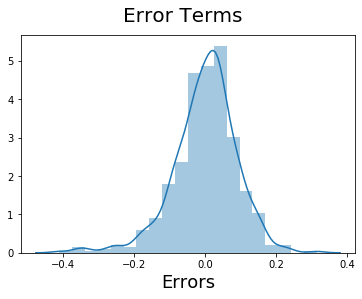

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step6: Making predictions on Test Set

## 6.1: Perform Scaling on Test Data

In [46]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

## 6.2: Dividing into X_test and y_test

In [47]:
y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
# Now let's use the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [49]:
# Making predictions
y_test_pred = lm6.predict(X_test_new)

# Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

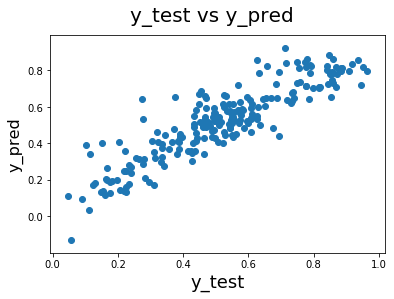

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [51]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7955844377237248

In [52]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]-1
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857567664604423

#### Final Result Comparision
1. Train: R-square = 83.6%, Adjusted R-square = 83.2%
2. Test: R-square = 79.56% , Adjusted R-square = 78.58%

#### Conclusion
The top 3 predictor variables are as follows.
1. temp: It has a coefficient of 0.5499
2. weathersit_lightsnow_lightrain : It has a coefficient of -0.2880
3. yr: It has a coefficient 0.2332


These three predictor variables has the highest coefficients (excluding positive and negative sign). So an unit change in these variables, will affect the target variable ‘cnt’ to the maximum extent. Therefore, these three variables will be given utmost importance, while planning to achieve maximum bike booking.
